In [62]:
using Plots
using LinearAlgebra
import PyPlot

In [29]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 1 method)

In [113]:
## parameter values
θ = 10.0; β = 8/3; μ = 28.0
Δt = 0.01

# initial values
x₀ = 1.0; y₀ = 1.0; z₀ = 1.0
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [121]:
# Runga-Kutta 4
x̄=x̄₀
tsteps=10000
XRK = zeros(3,tsteps)
for i=1:tsteps
    x̄=RK4(LorentzSystem,[θ,μ,β],x̄,Δt)
    XRK[:,i] = x̄
end
print(x̄)

[-2.155002637132397, -3.8091579429227114, 19.823983624136652]

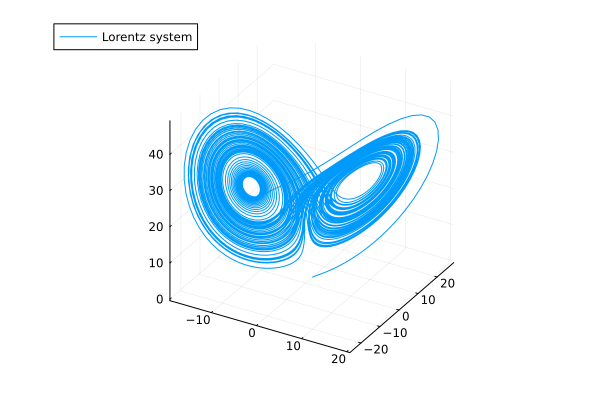

In [124]:
time = range(0,stop=(tsteps-1)*Δt,step=Δt)
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="Lorentz system")

In [122]:
# Euler
x̄=x̄₀
tsteps=10000
Xeuler = zeros(3,tsteps)
for i=1:tsteps
    x̄=EulerForward(LorentzSystem,[θ,μ,β],x̄,Δt)
    Xeuler[:,i] = x̄
end
print(x̄)

[6.848453794046506, 7.279209341012151, 24.3971536128102]

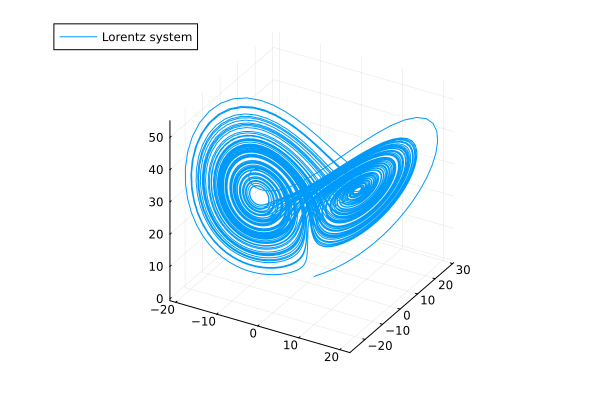

In [125]:
time = range(0,stop=(tsteps-1)*Δt,step=Δt)
plot(Xeuler[1,:],Xeuler[2,:],Xeuler[3,:],label="Lorentz system")

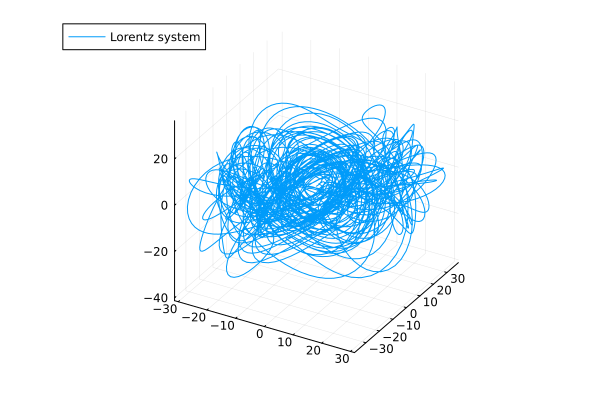

In [126]:
time = range(0,stop=(tsteps-1)*Δt,step=Δt)
plot(XRK[1,:]-Xeuler[1,:],XRK[2,:]-Xeuler[2,:],XRK[3,:]-Xeuler[3,:],label="Lorentz system")

In [127]:
C  = DTM([θ,μ,β],x̄₀,10)

MethodError: MethodError: no method matching DTM(::Vector{Float64}, ::Vector{Float64}, ::Int64)
Closest candidates are:
  DTM(::Any, ::Any, ::Any, !Matched::Any, !Matched::Any) at ~/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/DTM.jl:4